In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [102]:
import pickle

In [3]:
d =  pd.read_csv('mushroom.csv')

In [45]:
d1 = pd.read_csv('mushroom.csv')

In [47]:
df1 = pd.DataFrame(d1)

In [4]:
d.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
df = pd.DataFrame(d)

In [6]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [7]:
df['class'].describe()

count     8124
unique       2
top          e
freq      4208
Name: class, dtype: object

In [8]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [9]:
df.isnull().sum() #No null value in the dataset

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

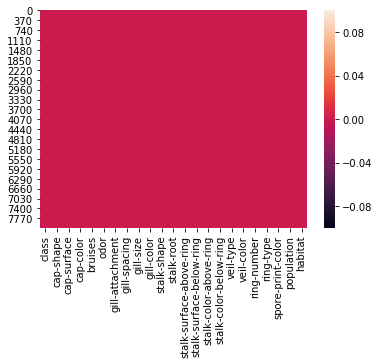

In [10]:
sns.heatmap(df.isnull())

In [11]:
for i in df.columns:
    print(i,df[i].unique()) # Total uniques categories in each column
    # stalk-root has one category '?' : need to replace it with mode

class ['p' 'e']
cap-shape ['x' 'b' 's' 'f' 'k' 'c']
cap-surface ['s' 'y' 'f' 'g']
cap-color ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises ['t' 'f']
odor ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment ['f' 'a']
gill-spacing ['c' 'w']
gill-size ['n' 'b']
gill-color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape ['e' 't']
stalk-root ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring ['s' 'f' 'k' 'y']
stalk-surface-below-ring ['s' 'f' 'y' 'k']
stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type ['p']
veil-color ['w' 'n' 'o' 'y']
ring-number ['o' 't' 'n']
ring-type ['p' 'e' 'l' 'f' 'n']
spore-print-color ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population ['s' 'n' 'a' 'v' 'y' 'c']
habitat ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [12]:
df['stalk-root'] = np.where(df['stalk-root']=='?',df['stalk-root'].mode(),df['stalk-root'])

In [13]:
df['stalk-root'].unique()  #replaced

array(['e', 'c', 'b', 'r'], dtype=object)

In [14]:
label_encoder = LabelEncoder()

In [15]:
df['class']= label_encoder.fit_transform(df['class'])

In [16]:
df['class'].unique()

array([1, 0])

In [18]:
df['cap-shape']= label_encoder.fit_transform(df['cap-shape'])

In [20]:
df['cap-surface']= label_encoder.fit_transform(df['cap-surface'])

In [21]:
df['cap-color']= label_encoder.fit_transform(df['cap-color'])

In [22]:
df['bruises']= label_encoder.fit_transform(df['bruises'])

In [23]:
df['odor']= label_encoder.fit_transform(df['odor'])

In [24]:
df['gill-attachment']= label_encoder.fit_transform(df['gill-attachment'])

In [25]:
df['gill-spacing']= label_encoder.fit_transform(df['gill-spacing'])

In [26]:
df['gill-size']= label_encoder.fit_transform(df['gill-size'])

In [27]:
df['gill-color']= label_encoder.fit_transform(df['gill-color'])

In [29]:
df['stalk-shape']= label_encoder.fit_transform(df['stalk-shape'])

In [30]:
df['stalk-root']= label_encoder.fit_transform(df['stalk-root'])

In [31]:
df['stalk-surface-above-ring'] = label_encoder.fit_transform(df['stalk-surface-above-ring'])

In [32]:
df['stalk-surface-below-ring'] = label_encoder.fit_transform(df['stalk-surface-below-ring'])

In [33]:
df['stalk-color-above-ring'] = label_encoder.fit_transform(df['stalk-color-above-ring'])

In [34]:
df['stalk-color-below-ring'] = label_encoder.fit_transform(df['stalk-color-below-ring'])

In [35]:
df['veil-type'] = label_encoder.fit_transform(df['veil-type'])

In [36]:
df['veil-color'] = label_encoder.fit_transform(df['veil-color'])

In [37]:
df['ring-number'] = label_encoder.fit_transform(df['ring-number'])

In [38]:
df['ring-type'] = label_encoder.fit_transform(df['ring-type'])

In [39]:
df['spore-print-color'] = label_encoder.fit_transform(df['spore-print-color'])

In [40]:
df['population'] = label_encoder.fit_transform(df['population'])

In [41]:
df['habitat'] = label_encoder.fit_transform(df['habitat'])

Encoded Each feature

In [42]:
for i in df.columns:
    print(i,df[i].unique())

class [1 0]
cap-shape [5 0 4 2 3 1]
cap-surface [2 3 0 1]
cap-color [4 9 8 3 2 5 0 7 1 6]
bruises [1 0]
odor [6 0 3 5 2 1 8 7 4]
gill-attachment [1 0]
gill-spacing [0 1]
gill-size [1 0]
gill-color [ 4  5  2  7 10  3  9  1  0  8 11  6]
stalk-shape [0 1]
stalk-root [2 1 0 3]
stalk-surface-above-ring [2 0 1 3]
stalk-surface-below-ring [2 0 3 1]
stalk-color-above-ring [7 3 6 4 0 2 5 1 8]
stalk-color-below-ring [7 6 3 0 4 2 8 5 1]
veil-type [0]
veil-color [2 0 1 3]
ring-number [1 2 0]
ring-type [4 0 2 1 3]
spore-print-color [2 3 6 1 7 5 4 8 0]
population [3 2 0 4 5 1]
habitat [5 1 3 0 4 6 2]


In [48]:
df_new = df1.copy()


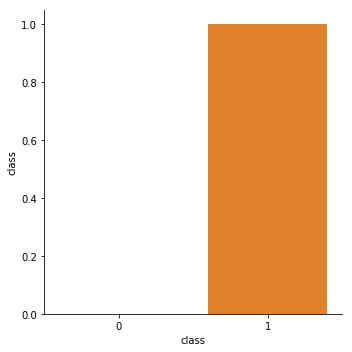

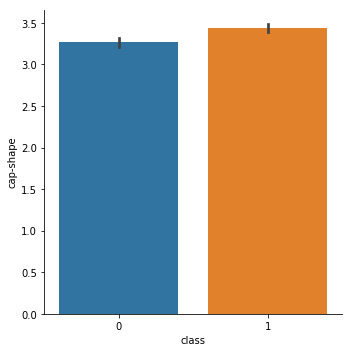

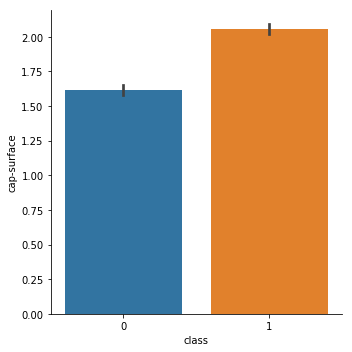

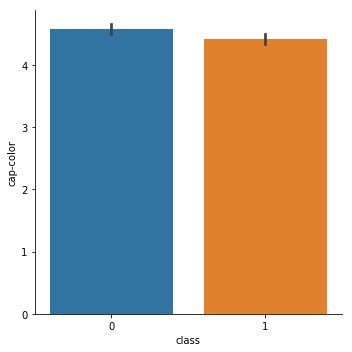

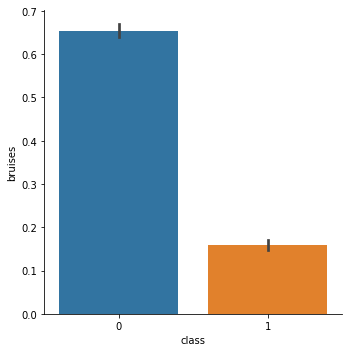

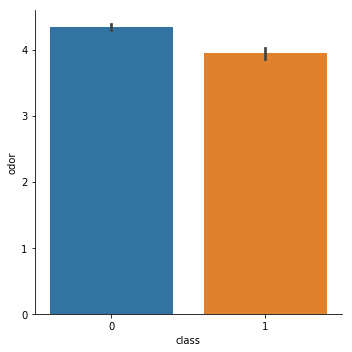

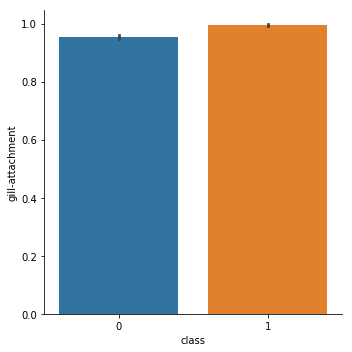

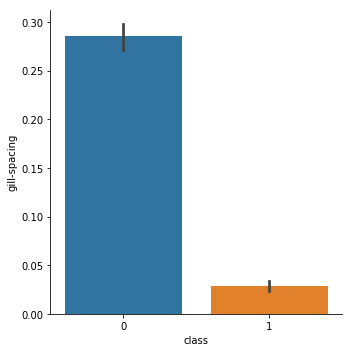

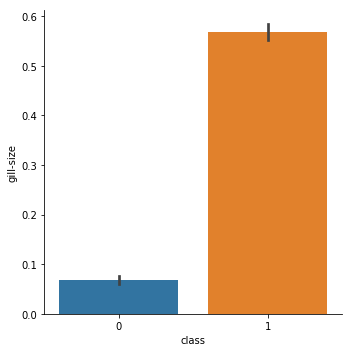

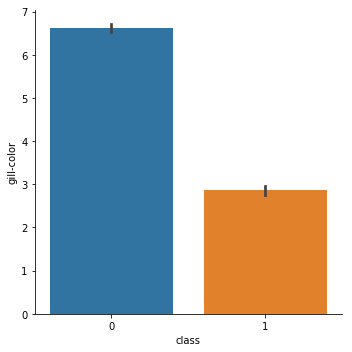

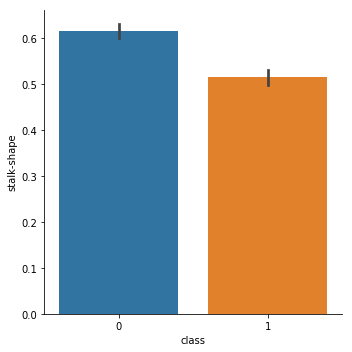

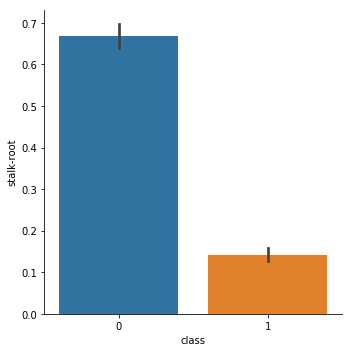

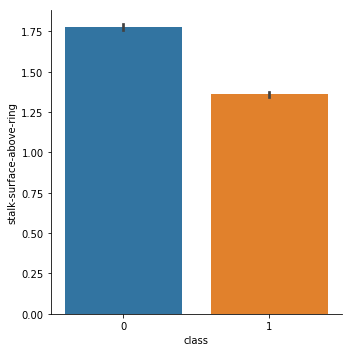

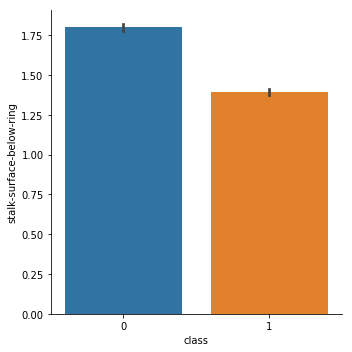

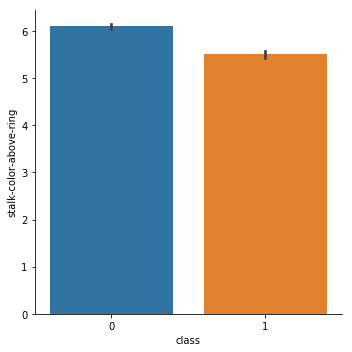

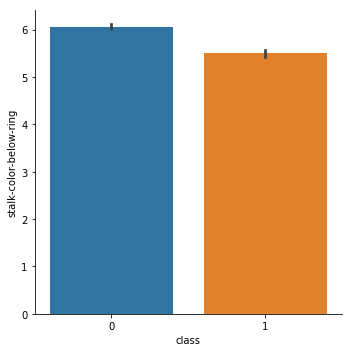

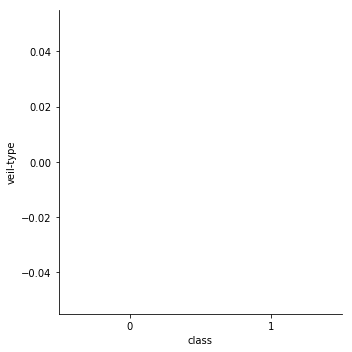

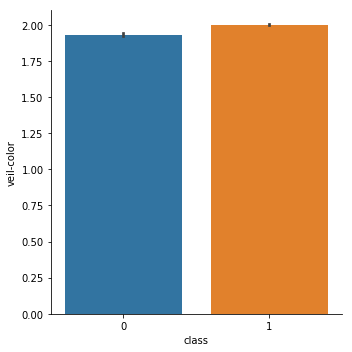

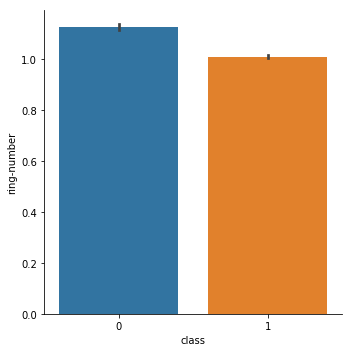

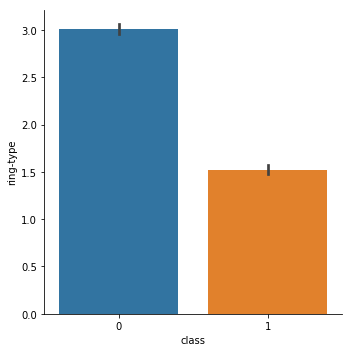

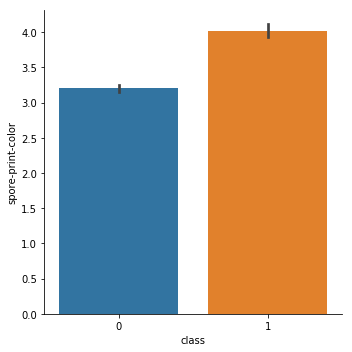

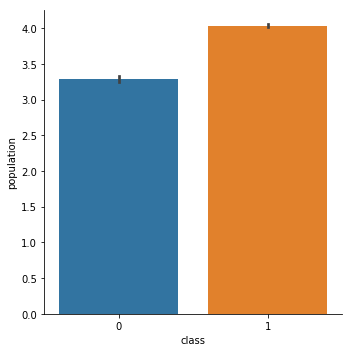

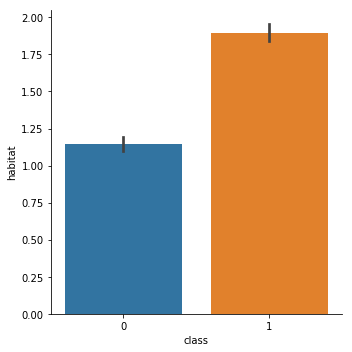

In [51]:
for feature in df.columns:
    g = sns.catplot(x='class',y=feature,kind='bar',data=df)
    plt.show()

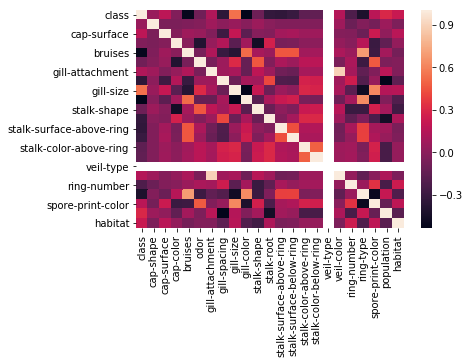

In [52]:
sns.heatmap(df.corr())

 Veil-type has no relation with class : so dropping it

In [54]:
df.drop('veil-type',axis=1,inplace=True)

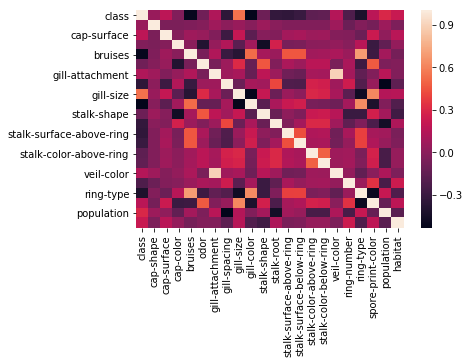

In [56]:
sns.heatmap(df.corr())

In [58]:
for i in df.columns:
    print(i,df[i].value_counts())

class 0    4208
1    3916
Name: class, dtype: int64
cap-shape 5    3656
2    3152
3     828
0     452
4      32
1       4
Name: cap-shape, dtype: int64
cap-surface 3    3244
2    2556
0    2320
1       4
Name: cap-surface, dtype: int64
cap-color 4    2284
3    1840
2    1500
9    1072
8    1040
0     168
5     144
1      44
7      16
6      16
Name: cap-color, dtype: int64
bruises 0    4748
1    3376
Name: bruises, dtype: int64
odor 5    3528
2    2160
7     576
8     576
3     400
0     400
6     256
1     192
4      36
Name: odor, dtype: int64
gill-attachment 1    7914
0     210
Name: gill-attachment, dtype: int64
gill-spacing 0    6812
1    1312
Name: gill-spacing, dtype: int64
gill-size 0    5612
1    2512
Name: gill-size, dtype: int64
gill-color 0     1728
7     1492
10    1202
5     1048
2      752
3      732
9      492
4      408
1       96
11      86
6       64
8       24
Name: gill-color, dtype: int64
stalk-shape 1    4608
0    3516
Name: stalk-shape, dtype: int64
stalk-root 0

#Some of the categories in the feature have very less frequencies compare to total value counts:
1. cap-shape[1] has 4
2. cap-surface[1] has 4
3. stalk-color-above-ring[8] has 8

In [59]:
df['cap-shape'] = np.where(df['cap-shape']==1,df['cap-shape'].mode(),df['cap-shape'])

In [61]:
df['cap-surface'] = np.where(df['cap-surface']==1,df['cap-surface'].mode(),df['cap-surface'])

In [62]:
df['stalk-color-above-ring'] = np.where(df['stalk-color-above-ring']==8,df['stalk-color-above-ring'].mode(),df['stalk-color-above-ring'])

#### therefore Replaced those with mode 

In [64]:
y = df['class']

In [66]:
df_n = df.copy()

In [67]:
df.drop('class',axis=1,inplace=True)

In [68]:
x = df

In [71]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33)

In [72]:
lr = LogisticRegression()

In [73]:
lr.fit(x,y)

LogisticRegression()

In [74]:
pred = lr.predict(x_test) 

In [75]:
accuracy_score(y_test,pred)

0.9604625139873182

In [76]:
algo_list = [LogisticRegression,DecisionTreeClassifier,SVC, KNeighborsClassifier]

In [78]:
for algo in algo_list:
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33)
    ob = algo()
    ob.fit(x_train,y_train)
    p = ob.predict(x_test)
    print(algo,accuracy_score(y_test,p))

<class 'sklearn.linear_model._logistic.LogisticRegression'> 0.9537486012681835
<class 'sklearn.tree._classes.DecisionTreeClassifier'> 1.0
<class 'sklearn.svm._classes.SVC'> 0.988810145468109
<class 'sklearn.neighbors._classification.KNeighborsClassifier'> 0.9977620290936218


#Decision Tree Classifier is giving best accuracy_score

In [81]:
dtc = DecisionTreeClassifier()

In [82]:
svc= SVC()
k_n=KNeighborsClassifier()

In [79]:
from sklearn.model_selection import cross_val_score

In [89]:
cross_score = cross_val_score(dtc,x,y,cv=7,scoring='accuracy')
print(cross_score.mean())

0.9271207511784897


In [85]:
cross_score = cross_val_score(lr,x,y,cv=5,scoring='accuracy')
print(cross_score.mean())

0.8834197802197801


In [88]:
cross_score = cross_val_score(k_n,x,y,cv=7,scoring='accuracy')
print(cross_score.mean())

0.9256469495042069


In [91]:
cross_score = cross_val_score(svc,x,y,cv=7,scoring='accuracy')
print(cross_score.mean())

0.8877241888468833


#kneigbours and decision tress are giving almost equal result

In [93]:
from sklearn.model_selection import GridSearchCV

In [100]:
grid_param = {'criterion':['gini','entropy']}
gd_sr = GridSearchCV(estimator=dtc,param_grid=grid_param,scoring='accuracy',cv=7)
gd_sr.fit(x,y)

GridSearchCV(cv=7, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy']}, scoring='accuracy')

In [101]:
best_para = gd_sr.best_params_
print(best_para)
best_res = gd_sr.best_score_
print(best_res)

{'criterion': 'gini'}
0.9152980910799675


In [103]:
mushroom_file = 'pickl.pkl'
pickle.dump(gd_sr,open(mushroom_file,'wb'))